In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
file = "//home//vinicius//Data_Science//Notebooks//Data_Files//kyphosis.csv"
df1 = pd.read_csv(file)

In [6]:
df1.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


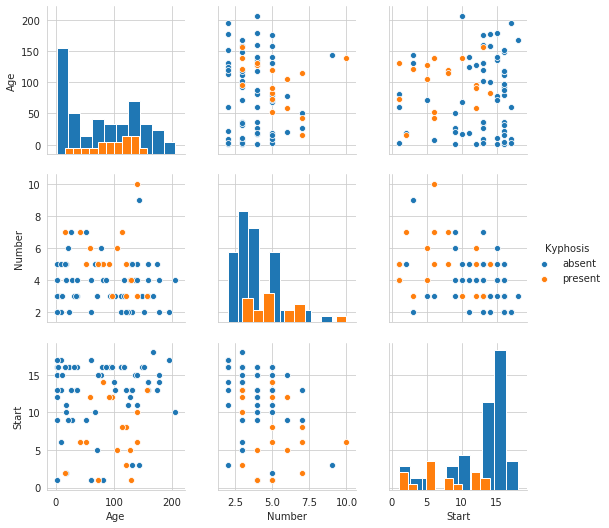

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df1, hue='Kyphosis', diag_kind='hist')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
x = df1.drop('Kyphosis', axis=1)
y = df1['Kyphosis']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
predict = dtree.predict(x_test)

In [39]:
print(classification_report(y_test,predict))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

      absent       0.95      0.83      0.89        24
     present       0.00      0.00      0.00         1

    accuracy                           0.80        25
   macro avg       0.48      0.42      0.44        25
weighted avg       0.91      0.80      0.85        25



Confusion Matrix:
 [[20  4]
 [ 1  0]]


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=200)

In [42]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
pred = rfc.predict(x_test)

In [44]:
print(classification_report(y_test,pred))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

      absent       0.95      0.88      0.91        24
     present       0.00      0.00      0.00         1

    accuracy                           0.84        25
   macro avg       0.48      0.44      0.46        25
weighted avg       0.92      0.84      0.88        25



Confusion Matrix:
 [[21  3]
 [ 1  0]]


**In small datasets the difference isnt significant**